In [1]:
import sys
!{sys.executable} -m pip install pandas

In [14]:
import pandas as pd
import json

data = pd.read_csv('seven.csv')

# The next line cleans the data by removing duplicate lines.
data.drop_duplicates(inplace = True)

data['Published At'] = pd.to_datetime(data['Published At'])

time_periods = [
    ('2020', '2020-01-01', '2020-12-31'),
    ('2021', '2021-01-01', '2021-12-31'),
    ('2022', '2022-01-01', '2022-12-31'),
    ('2023', '2023-01-01', '2023-12-31'),
    ('2024_first_third', '2024-01-01', '2024-04-30'),
    ('2024_second_third', '2024-05-01', '2024-08-31'),
    ('2024_third_third', '2024-09-01', '2024-12-31'),
    ('2025_first_third', '2025-01-01', '2025-04-30'),
    ('2025_second_third', '2025-05-01', '2025-08-31'),
]

results = {}

for name, start, end in time_periods:
    filter = (data['Published At'] >= start) & (data['Published At'] <= end)
    filtered = data[filter]
    
    if int(filtered['Likes'].sum()) > 0:
        views_likes = (int(filtered['Views'].sum()))/int(filtered['Likes'].sum())
    else:
        views_likes = 0

    results[name] = {
        'videos': int(len(filtered)),   
        'views' : int(filtered['Views'].sum()),
        'likes' : int(filtered['Likes'].sum()),
    }

# In JSON-Datei speichern
with open('answer_seven.json', 'w', encoding='utf-8') as file:
    json.dump(results, file, indent=5)


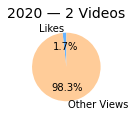

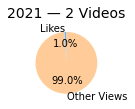

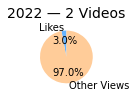

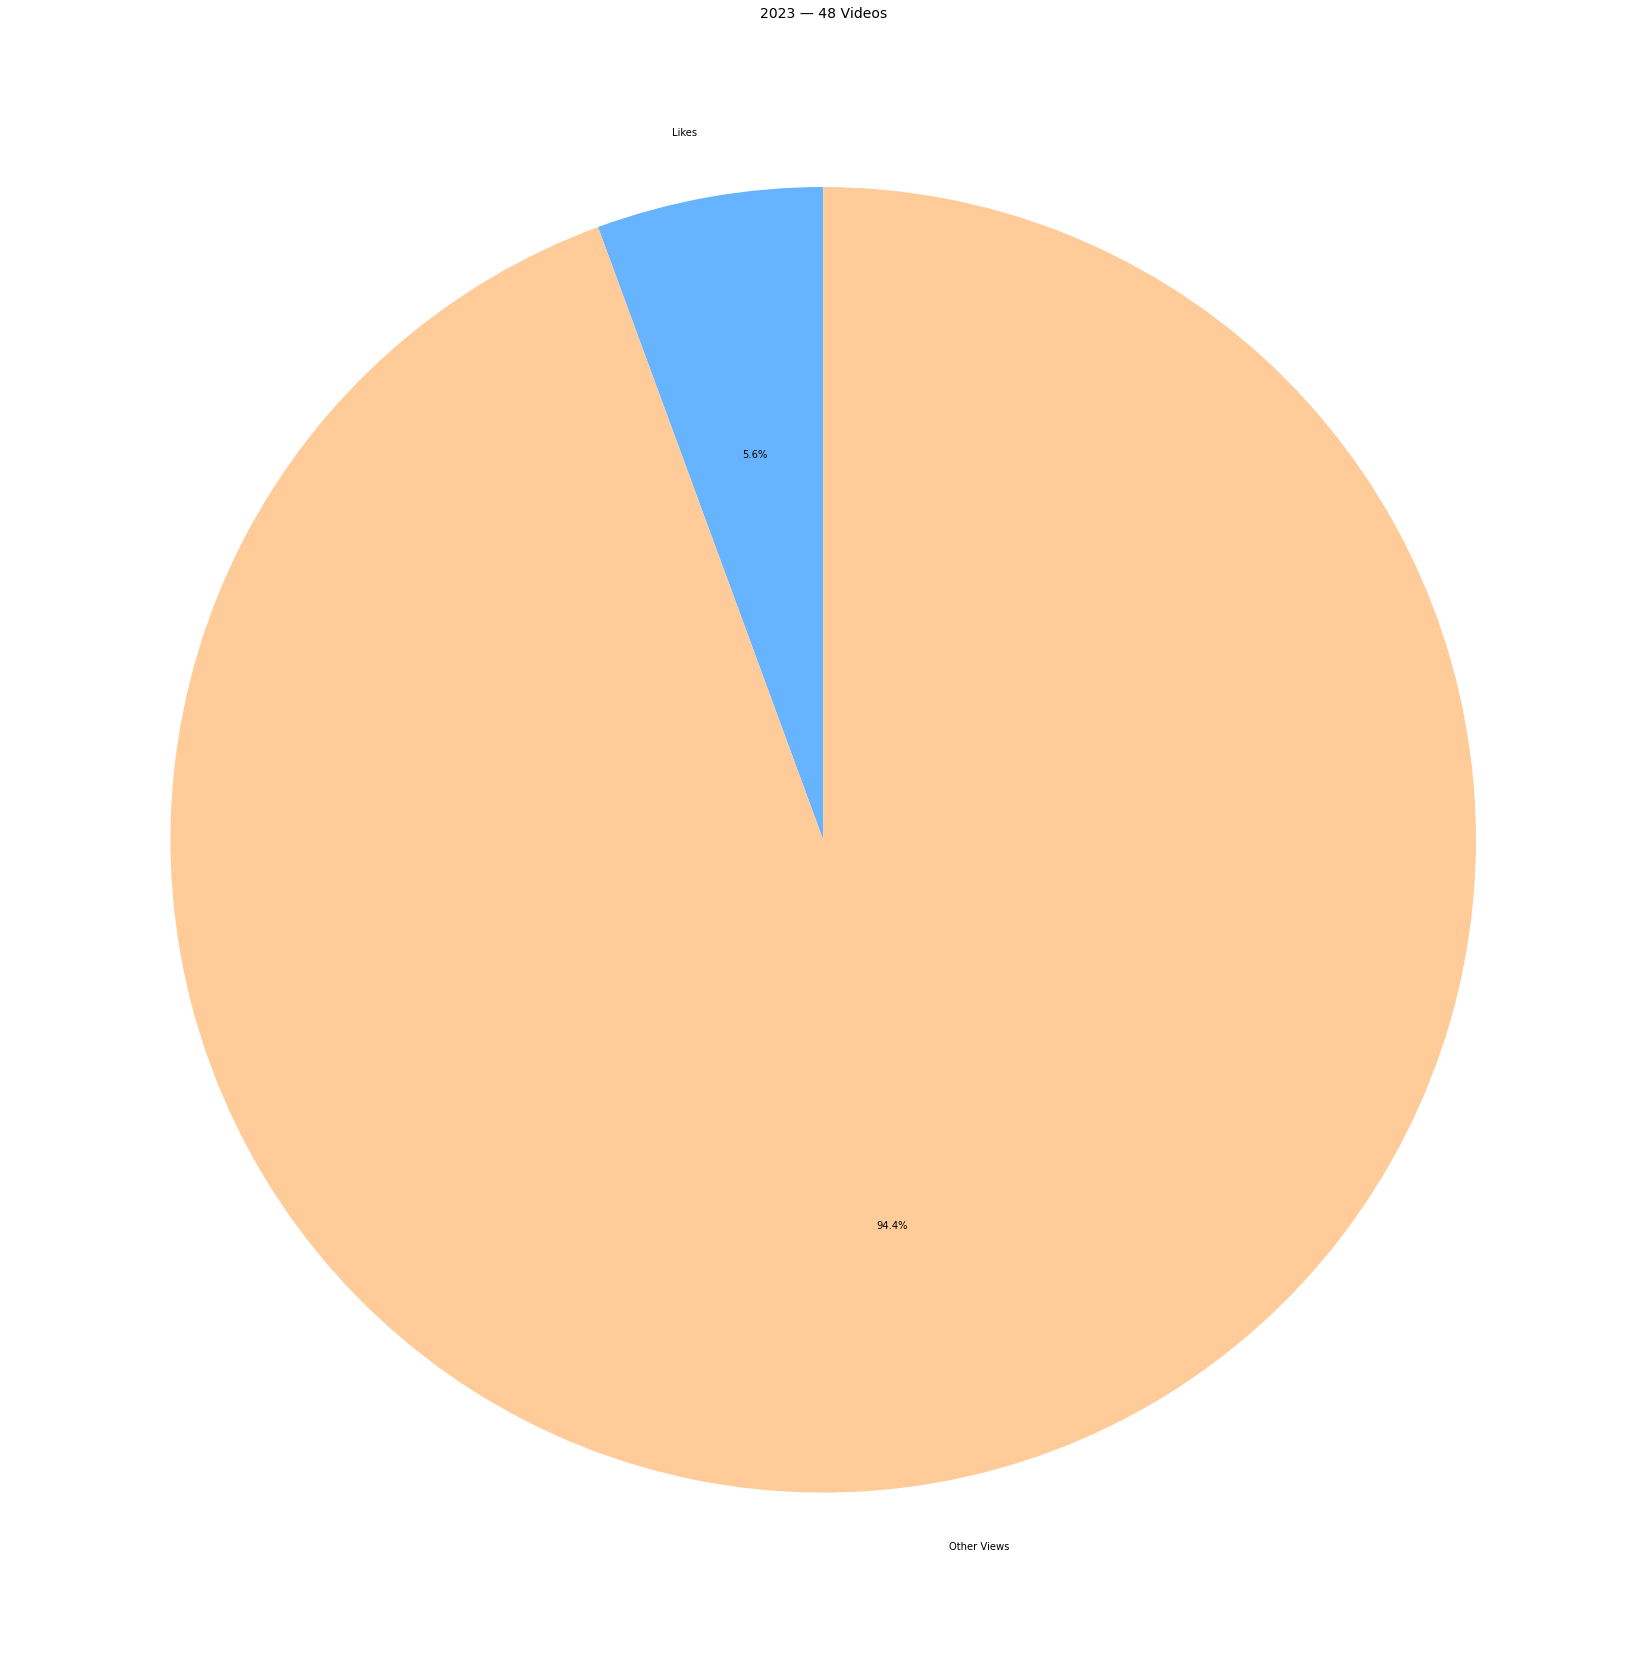

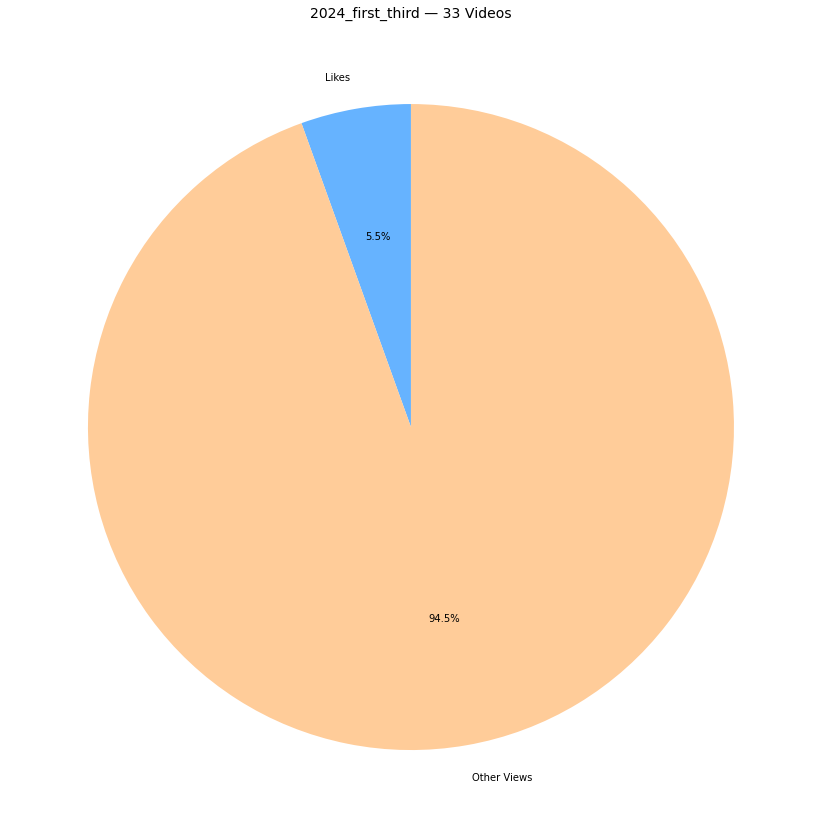

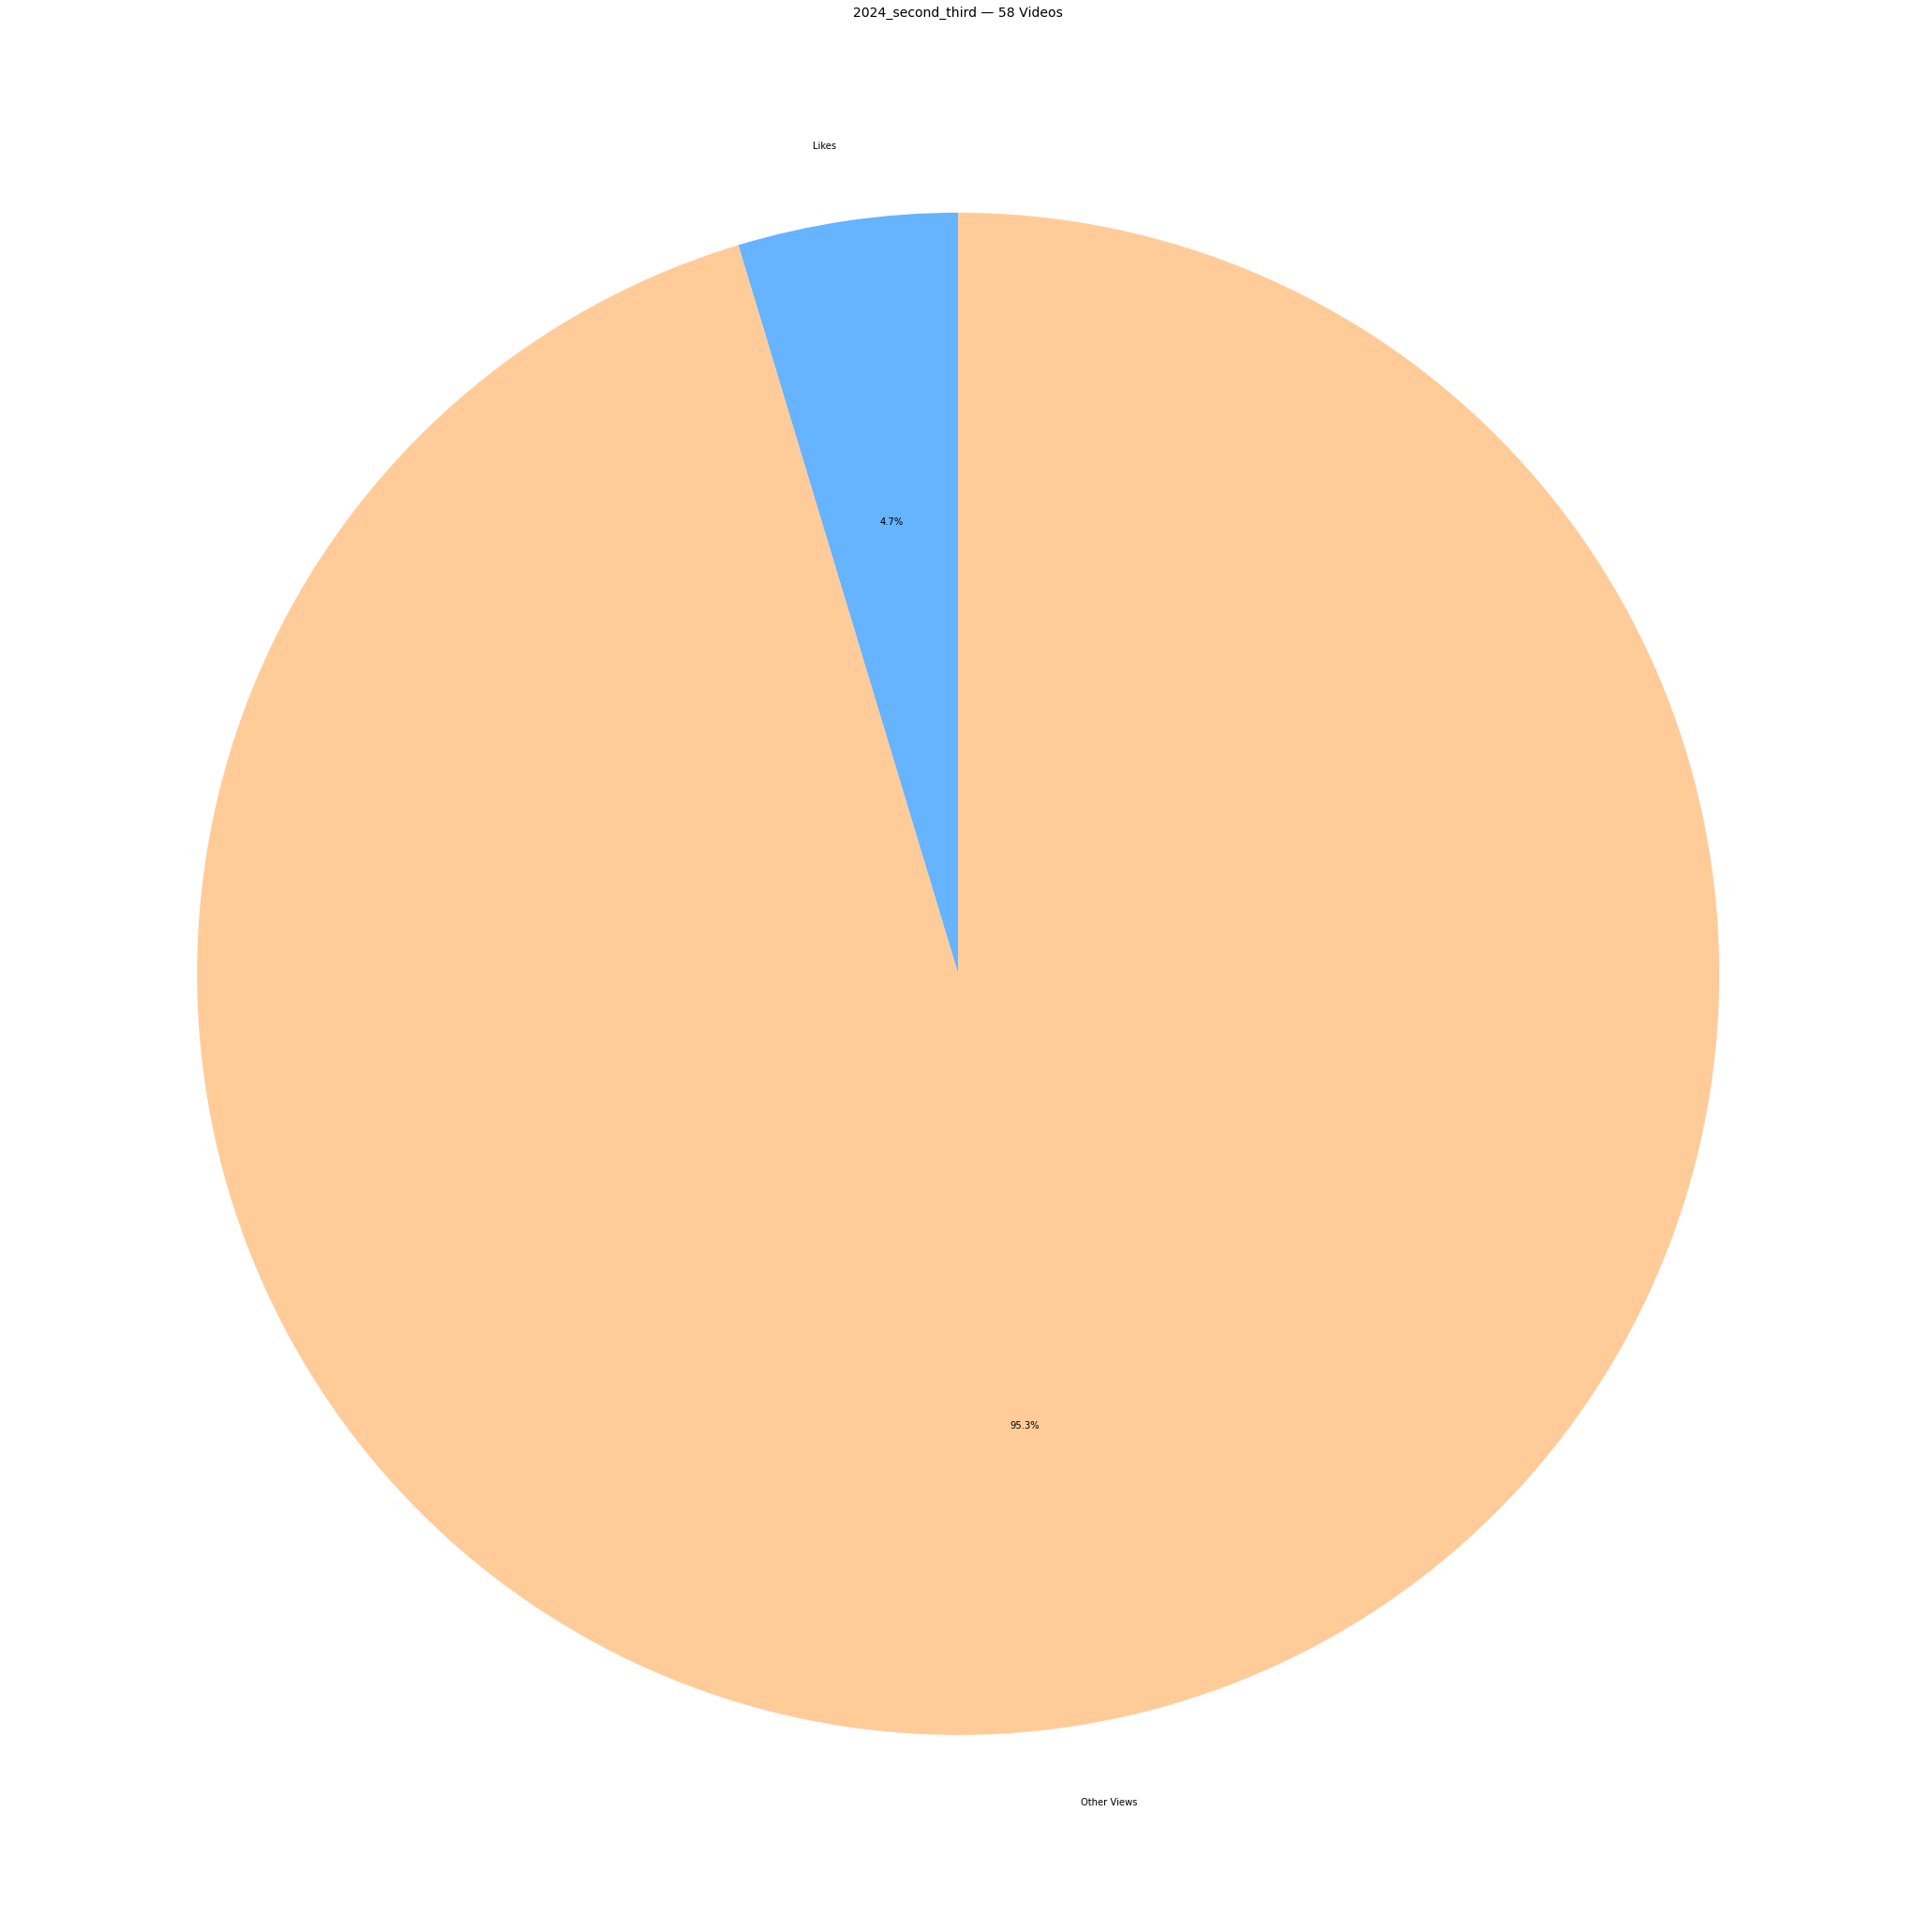

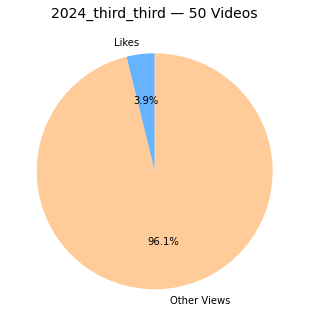

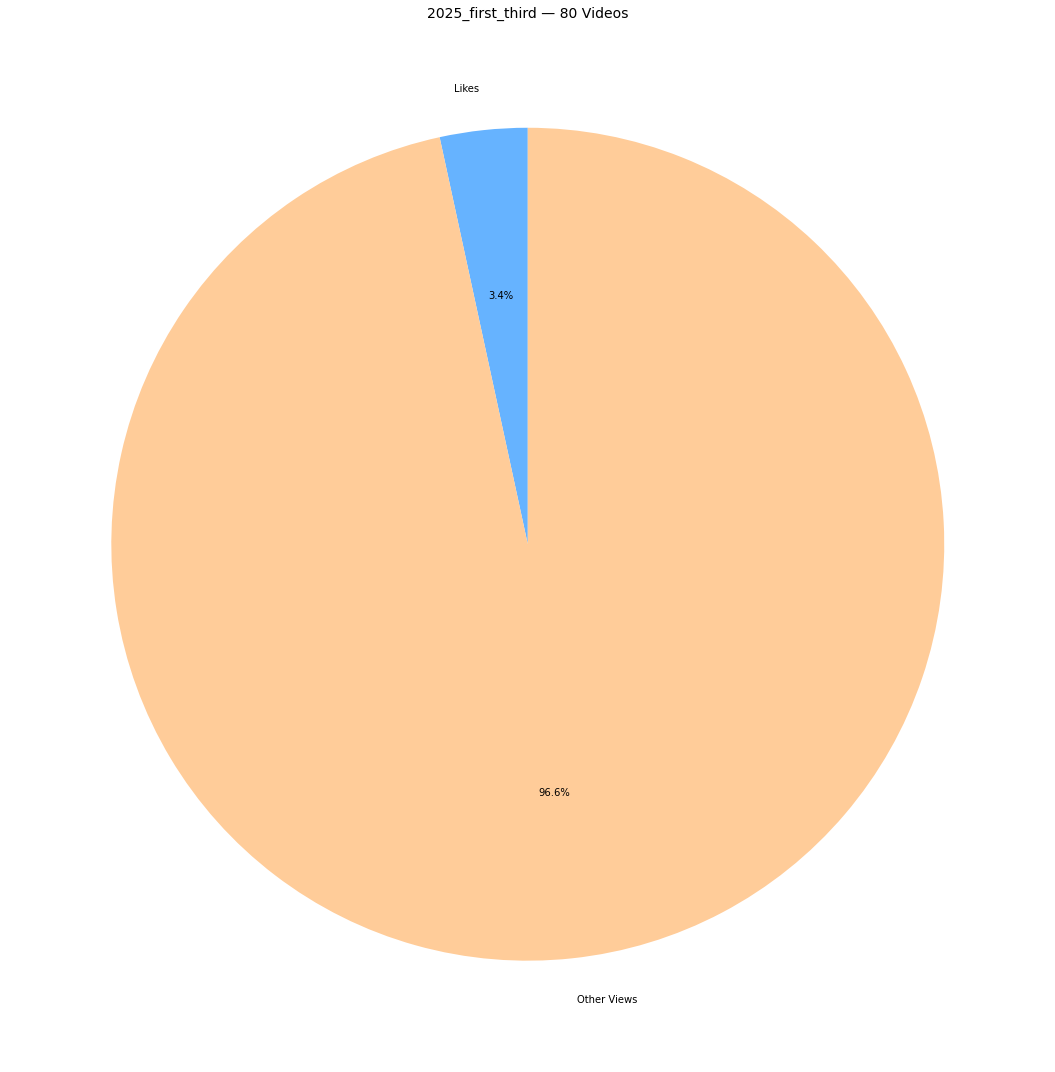

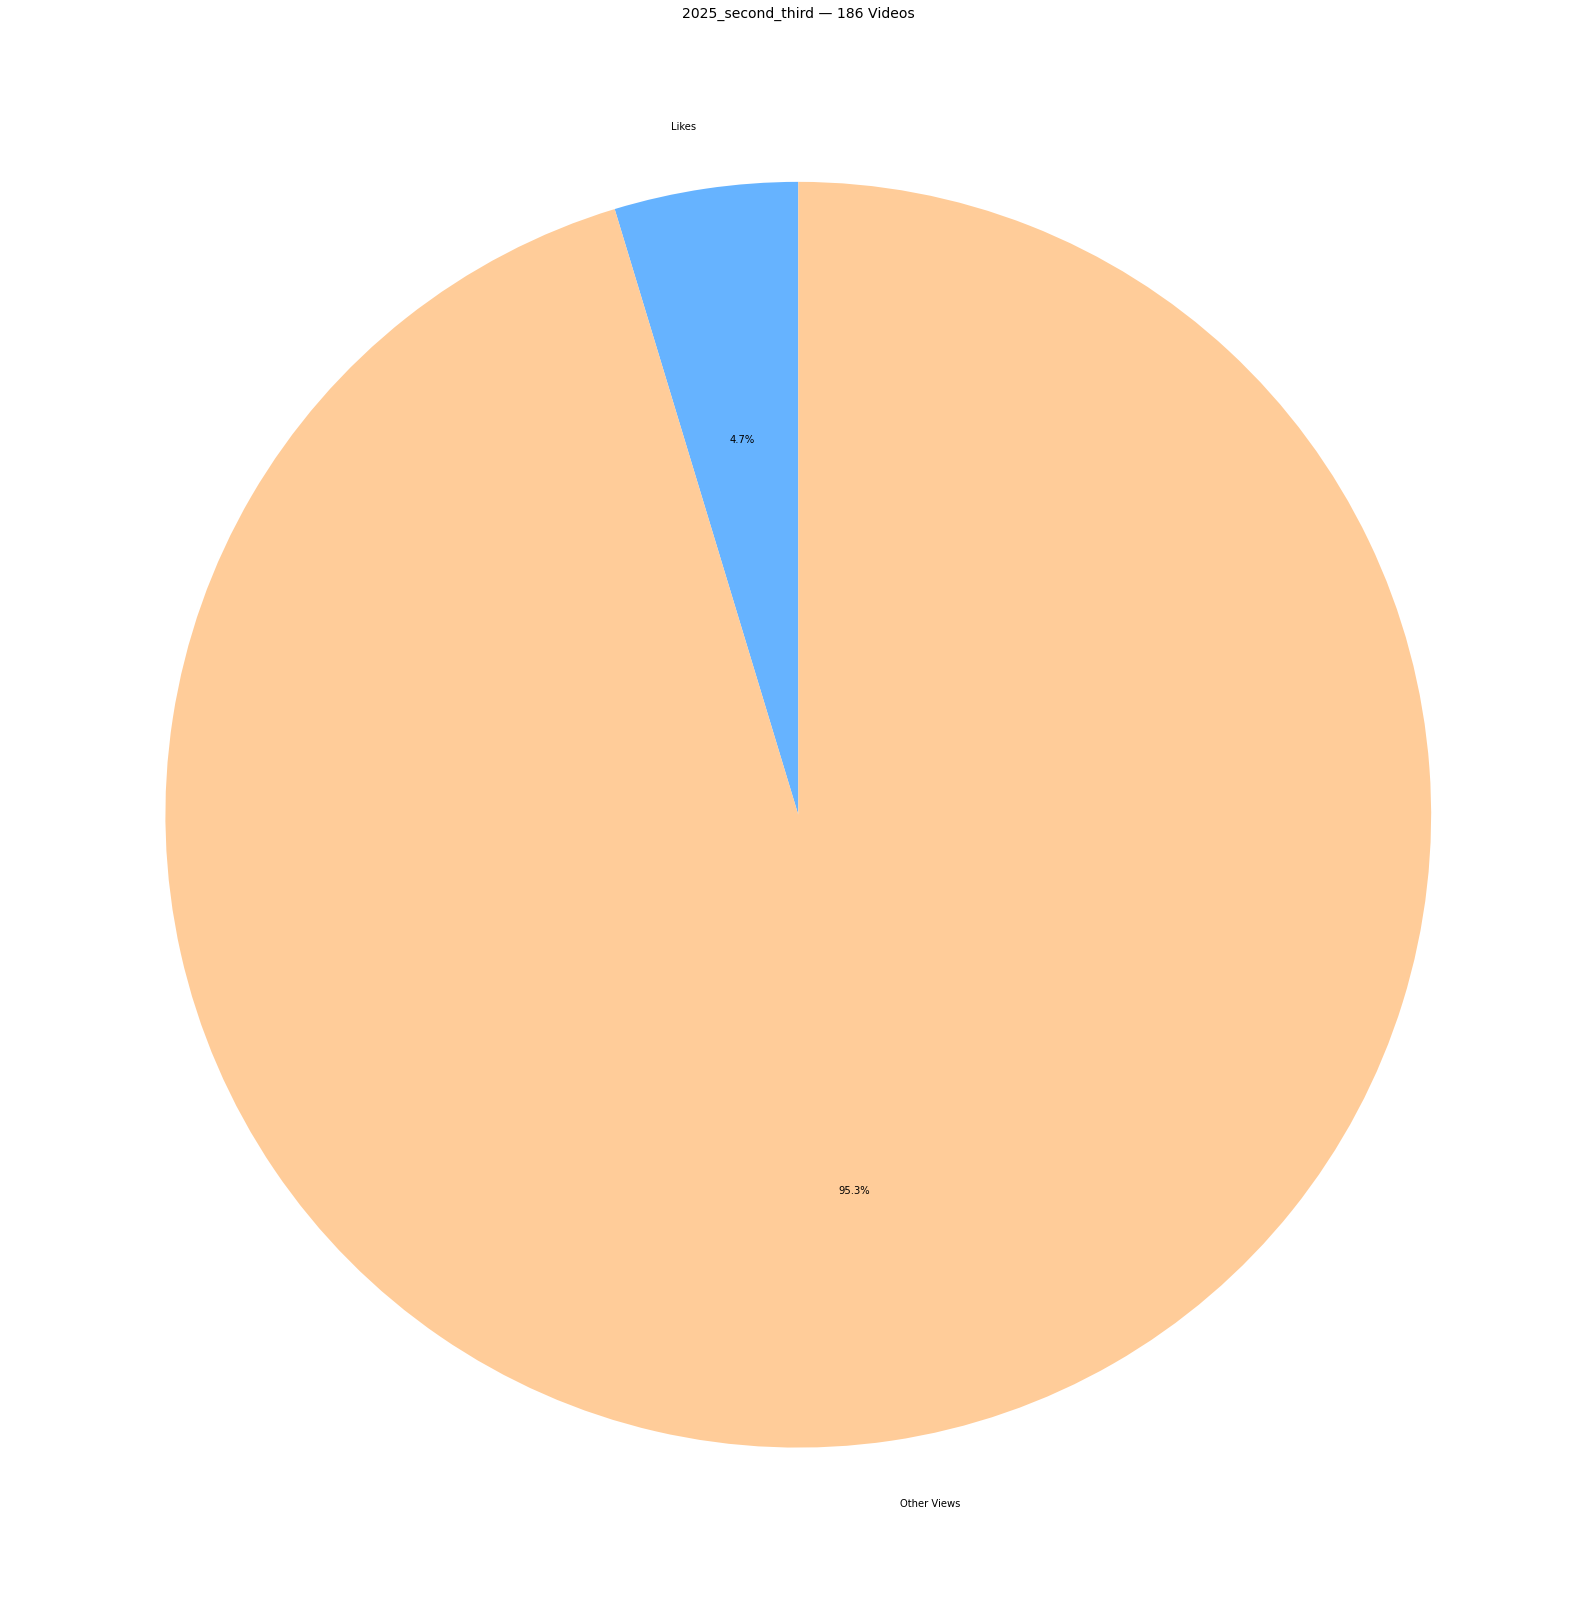

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import json

with open('answer_seven.json', 'r', encoding='utf-8') as file:
    statistics = json.load(file)

data = pd.DataFrame.from_dict(statistics, orient='index')

for period in data.index:
    views = data.loc[period, 'views']
    likes = data.loc[period, 'likes']
    videos = data.loc[period, 'videos']

    likes = likes
    others = max(0, views - likes)

    fig, ax = plt.subplots(figsize=(views * 0.000001 + 1, views * 0.000001 + 1))
    ax.pie(
        [likes, others],
        labels=['Likes', 'Other Views'],
        colors=['#66b3ff', '#ffcc99'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(f'{period} — {videos} Videos', fontsize=14)
    plt.tight_layout()
    plt.show()